# Vigipy Test Notebook

This notebook really shows how Vigipy works. This uses the Vigipy dataset that ships with the code.  
This is a relatively small dataset, has weird statistical properties so this does not always converge in the way that you might expect it to...

In [1]:
from vigipy import * 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 

In [2]:
# read in the model dataset 

# vigipy dataset (quite small)
vigipy_dataset_path = "C:/Users/damlteam/Documents/vigipy_test/vigipy/test/fixtures/sample.csv"

df = pd.read_csv(vigipy_dataset_path)
vigipy_data = convert(df)

In [3]:
import time as time

In [4]:
time_start = time.time() 
results = gps(vigipy_data, minimization_method = "L-BFGS-B", message=True)
time_stop = time.time()
time1 = time_stop-time_start

OPTIMISED PRIORS REACHED:  [0.37707855 0.33726074 1.06787318 1.85505487 1.        ]
CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH


In [5]:
time_start = time.time()
results5 = gps(vigipy_data, minimization_method = 'L-BFGS-B', message=True, opt_likelihood=True)
time_stop = time.time()
time5 = time_stop-time_start 

OPTIMISED PRIORS REACHED:  [0.37768309 0.33820901 1.16909249 1.80451351 1.        ]
CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH


In [6]:
time_start = time.time() 
results2 = gps(vigipy_data, minimization_method = "Nelder-Mead", message=True)
time_stop = time.time()
time2 = time_stop-time_start 

OPTIMISED PRIORS REACHED:  [0.03166897 0.11440894 0.57584673 0.42938486 0.21174007]
Optimization terminated successfully.


In [7]:
time_start = time.time()
results6 = gps(vigipy_data, minimization_method = 'Nelder-Mead', message=True, opt_likelihood=True)
time_stop = time.time()
time6 = time_stop-time_start 

OPTIMISED PRIORS REACHED:  [0.1559299  2.14356842 0.71247118 0.45188401 0.30960441]
Maximum number of iterations has been exceeded.


In [8]:
time_start = time.time()
results3 = gps(vigipy_data, minimization_method = 'SLSQP', message=True)
time_stop = time.time()
time3 = time_stop-time_start 

OPTIMISED PRIORS REACHED:  [1.22930972 0.54055689 0.26173159 0.68420872 0.38619472]
Optimization terminated successfully


In [9]:
time_start = time.time()
results7 = gps(vigipy_data, minimization_method = 'SLSQP', message=True, opt_likelihood=True)
time_stop = time.time()
time7 = time_stop-time_start 

OPTIMISED PRIORS REACHED:  [0.91869481 0.54454381 0.20469242 0.28468388 0.40685344]
Optimization terminated successfully


In [10]:
time_start = time.time()
results4 = gps(vigipy_data, minimization_method = 'Powell', message=True)
time_stop = time.time()
time4 = time_stop-time_start 

OPTIMISED PRIORS REACHED:  [0.34262616 1.24457796 2.50441971 0.91868906 0.66071569]
Optimization terminated successfully.


In [11]:
time_start = time.time()
results8 = gps(vigipy_data, minimization_method = 'Powell', message=True, opt_likelihood=True)
time_stop = time.time()
time8 = time_stop-time_start 

OPTIMISED PRIORS REACHED:  [0.33988022 1.36855076 2.39662085 0.9106179  0.63761528]
Optimization terminated successfully.


In [12]:
# time_start = time.time()
# results9 = gps(vigipy_data, sim_anneal=True, message=True)
# time_stop = time.time()
# time9 = time_stop-time_start 

## SLOW SLOW SLOW 

In [13]:
time_start = time.time()
results10 = gps(vigipy_data, sim_anneal=True, message=True, opt_likelihood=True)
time_stop = time.time()
time10 = time_stop-time_start

USING SIMULATED ANNEALING: EXPERIMENTAL
OPTIMISED PRIORS REACHED:  [0.12008166 5.14118053 0.61744521 0.42931216 0.23088699]
['Maximum number of iteration reached']


In [14]:
from vigipy import non_truncated_likelihood, non_truncated_likelihood_optimised
from vigipy import calculate_expected

In [15]:
# calculate the likelihood function with each of these prior sets to see under which of them it has actually been minimised

# this step to do the preprocessing to make this relatively doable 

container = vigipy_data
DATA = container.data
N = container.N

n11 = np.asarray(DATA["events"], dtype=np.float64)
n1j = np.asarray(DATA["product_aes"], dtype=np.float64)
ni1 = np.asarray(DATA["count_across_brands"], dtype=np.float64)
expected = calculate_expected(N, n1j, ni1, n11, 'mantel-haentzel', 1)

data_cont = container.contingency
n1__mat = data_cont.sum(axis=1)
n_1_mat = data_cont.sum(axis=0)
rep = len(n_1_mat)
n1__c = np.tile(n1__mat.values, reps=rep)
rep = len(n1__mat)
n_1_c = np.repeat(n_1_mat.values, repeats=rep)
E_c = np.asarray(n1__c, dtype=np.float64) * n_1_c / N
n11_c_temp = []
for col in data_cont:
    n11_c_temp.extend(list(data_cont[col]))
n11_c = np.asarray(n11_c_temp)

In [16]:
likeli1 = non_truncated_likelihood(results.param['prior_param'], n11_c, E_c)
likeli2 = non_truncated_likelihood(results2.param['prior_param'], n11_c, E_c)
likeli3 = non_truncated_likelihood(results3.param['prior_param'], n11_c, E_c)
likeli4 = non_truncated_likelihood(results4.param['prior_param'], n11_c, E_c)
likeli5 = non_truncated_likelihood_optimised(results5.param['prior_param'], n11_c, E_c)
likeli6 = non_truncated_likelihood_optimised(results6.param['prior_param'], n11_c, E_c)
likeli7 = non_truncated_likelihood_optimised(results7.param['prior_param'], n11_c, E_c)
likeli8 = non_truncated_likelihood_optimised(results8.param['prior_param'], n11_c, E_c)
#likeli9 = non_truncated_likelihood(results9.param['prior_param'], n11_c, E_c)
likeli10 = non_truncated_likelihood_optimised(results10.param['prior_param'], n11_c, E_c)


In [17]:
# testing whether the optimised function actually changes anything? 
test1 = 100*abs(non_truncated_likelihood(results.param['prior_param'], n11_c, E_c) - non_truncated_likelihood_optimised(results.param['prior_param'], n11_c, E_c))/non_truncated_likelihood_optimised(results.param['prior_param'], n11_c, E_c) 
test2 = 100*abs(non_truncated_likelihood(results2.param['prior_param'], n11_c, E_c) - non_truncated_likelihood_optimised(results2.param['prior_param'], n11_c, E_c))/non_truncated_likelihood_optimised(results2.param['prior_param'], n11_c, E_c) 
test3 = 100*abs(non_truncated_likelihood(results3.param['prior_param'], n11_c, E_c) - non_truncated_likelihood_optimised(results3.param['prior_param'], n11_c, E_c))/non_truncated_likelihood_optimised(results3.param['prior_param'], n11_c, E_c) 
test4 = 100*abs(non_truncated_likelihood(results4.param['prior_param'], n11_c, E_c) - non_truncated_likelihood_optimised(results4.param['prior_param'], n11_c, E_c))/non_truncated_likelihood_optimised(results4.param['prior_param'], n11_c, E_c) 

print(test1)
print(test2)
print(test3)
print(test4)

0.01168065740238529
0.011034106630171282
0.008842402421097965
0.0061446053410361655


In [18]:
# print("VALUE WITH BFGS-B = ", likeli1)
# print("VALUE WITH NELDER-MEAD = ", likeli2)
# print("VALUE WITH SQSLP = ", likeli3)
# print("VALUE WITH POWELL = ", likeli4)
# print("VALUE WITH BFGS-B WITH OPTIMISED LIKELIHOOD = ", likeli5)
# print("VALUE WITH NELDER-MEAD WITH OPTIMISED LIKELIHOOD = ", likeli6)
# print("VALUE WITH SQSLP WITH OPTIMISED LIKELIHOOD = ", likeli7)
# print("VALUE WITH POWELL WITH OPTIMISED LIKELIHOOD = ", likeli8)

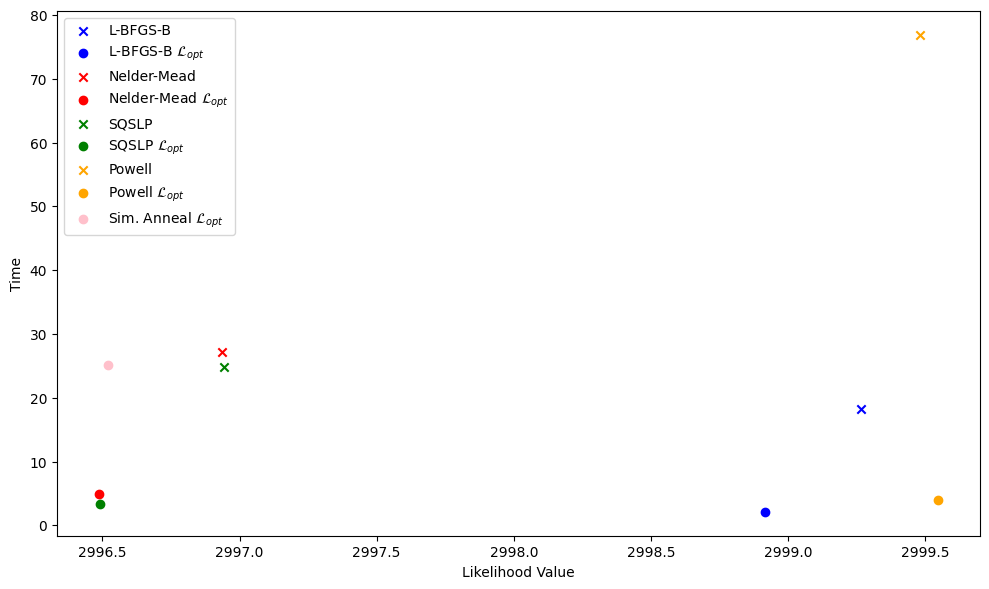

In [19]:
fig, ax = plt.subplots(figsize = (10, 6))
ax.scatter(likeli1, time1, color = 'blue', marker = 'x', label = "L-BFGS-B")
ax.scatter(likeli5, time5, color = 'blue', marker = 'o', label = r"L-BFGS-B $\mathcal{L}_{opt}$")

ax.scatter(likeli2, time2, color = 'red', marker = 'x', label = "Nelder-Mead")
ax.scatter(likeli6, time6, color = 'red', marker = 'o', label = r"Nelder-Mead $\mathcal{L}_{opt}$")

ax.scatter(likeli3, time3, color = 'green', marker = 'x', label = "SQSLP")
ax.scatter(likeli7, time7, color = 'green', marker = 'o', label = r"SQSLP $\mathcal{L}_{opt}$")

ax.scatter(likeli4, time4, color = 'orange', marker = 'x', label = "Powell")
ax.scatter(likeli8, time8, color = 'orange', marker = 'o', label = r"Powell $\mathcal{L}_{opt}$")

ax.scatter(likeli10, time10, color = 'pink', marker = 'o', label = r"Sim. Anneal $\mathcal{L}_{opt}$")

ax.legend() 
ax.set_xlabel(r"Likelihood Value")
ax.set_ylabel(r"Time")
fig.tight_layout()

In [104]:
# extract key results 
def extract(dataset, head_quant=30):
    data = dataset.all_signals.head(head_quant)
    filt = data[['Product', 'Adverse Event', 'log2']]
    return filt

In [105]:
def combine_columns(df):
    df['Prediction'] = df.apply(lambda row: (row['Product'], row['Adverse Event'], row['log2']), axis=1)
    return df[['Prediction']]

In [106]:
df1 = combine_columns(extract(results5)) # BFGS

In [107]:
df2 = combine_columns(extract(results6)) # Nelder-Mead

In [108]:
df3 = combine_columns(extract(results7)) # SQLSP

In [109]:
df4 = combine_columns(extract(results8)) # Powell 

# seems dubious at best

In [110]:
df5 = combine_columns(extract(results10)) # Sim. Anneal

In [111]:
def check_same_val1_val2(row):
    try:
        val1_val2_pairs = [(val1, val2) for val1, val2, val3 in row]
        return len(set(val1_val2_pairs)) == 1
    except Exception as e:
        print(f"Error processing row: {row}")
        print(e)
        return False

In [112]:
combined_df = pd.concat([df1, df2, df3, df4, df5], axis = 1)
combined_df.columns = ['BFGS', 'Nelder-Mead', 'SQSLP', 'Powell', 'Sim. Anneal.']
combined_df['Same'] = combined_df.apply(lambda row: check_same_val1_val2(row), axis=1)
combined_df

,BFGS,Nelder-Mead,SQSLP,Powell,Sim. Anneal.,Same
0,"(COLLAMEND, Plaque (lesion), 3.59204964219128)","(COLLAMEND, Plaque (lesion), 3.50269170713684)","(COLLAMEND, Plaque (lesion), 3.56228919928337)","(COLLAMEND, Plaque (lesion), 3.24378340433661)","(COLLAMEND, Plaque (lesion), 3.51715866527763)",True
1,"(PINNACLE, Pain in buttock, 3.40105731431326)","(PINNACLE, Pain in buttock, 3.21284141674238)","(PINNACLE, Pain in buttock, 3.32406958593692)","(PINNACLE, Incised wound, 2.97405954413736)","(PINNACLE, Pain in buttock, 3.24008438622771)",False
2,"(PINNACLE, Incised wound, 3.28327612161810)","(PINNACLE, Incised wound, 3.20136810668624)","(PINNACLE, Incised wound, 3.23595044549063)","(PINNACLE, Pain in buttock, 2.80351539651438)","(PINNACLE, Incised wound, 3.21380720460273)",False
3,"(PINNACLE, Nothing, 3.22351152261911)","(PINNACLE, Nothing, 3.06386208960384)","(PINNACLE, Nothing, 3.13656540730510)","(PINNACLE, Hematoma, 2.76319046257841)","(PINNACLE, Nothing, 3.08621195541528)",False
4,"(PINNACLE, Hematoma, 3.10653910985368)","(PINNACLE, Hematoma, 3.00901108336733)","(PINNACLE, Hematoma, 3.04065230256103)","(PINNACLE, Nothing, 2.71250314908347)","(PINNACLE, Hematoma, 3.02281439923205)",False
5,"(PINNACLE, Alveolar rhabdomyosarcoma, 3.041280...","(PINNACLE, Alveolar rhabdomyosarcoma, 2.883710...","(PINNACLE, Alveolar rhabdomyosarcoma, 2.940112...","(PINNACLE, Alveolar rhabdomyosarcoma, 2.558618...","(PINNACLE, Alveolar rhabdomyosarcoma, 2.904270...",True
6,"(GYNECARE, Urinary Retention, 2.98388760862012)","(GYNECARE, Urinary Retention, 2.83536070797827)","(GYNECARE, Urinary Retention, 2.88302332655136)","(XENMATRIX, Postoperative infection, 2.5301289...","(GYNECARE, Urinary Retention, 2.85438382454000)",False
7,"(SEAMGUARD, Postoperative Hemorrhage, 2.921144...","(XENMATRIX, Postoperative infection, 2.7438596...","(SEAMGUARD, Anastomotic Leak, 2.78736081760510)","(GYNECARE, Urinary Retention, 2.52865539125870)","(XENMATRIX, Postoperative infection, 2.7554155...",False
8,"(SEAMGUARD, Anastomotic Leak, 2.92114441314235)","(PINNACLE, Depressed mood, 2.73421726334991)","(SEAMGUARD, Postoperative Hemorrhage, 2.787360...","(STRATTICE, Serious Adverse Event, 2.457364838...","(PINNACLE, Depressed mood, 2.75435879176859)",False
9,"(PINNACLE, Depressed mood, 2.90092737110197)","(SEAMGUARD, Anastomotic Leak, 2.70096676538191)","(PINNACLE, Depressed mood, 2.78611084969700)","(STRATTICE, Serious Injury, 2.45255347992177)","(SEAMGUARD, Anastomotic Leak, 2.72673862552524)",False


In [113]:
combined_df = pd.concat([df1, df2, df3, df5], axis = 1) # dropping Powell 
combined_df.columns = ['BFGS', 'Nelder-Mead', 'SQSLP', 'Sim. Anneal.']
combined_df['Same'] = combined_df.apply(lambda row: check_same_val1_val2(row), axis=1)
combined_df

,BFGS,Nelder-Mead,SQSLP,Sim. Anneal.,Same
0,"(COLLAMEND, Plaque (lesion), 3.59204964219128)","(COLLAMEND, Plaque (lesion), 3.50269170713684)","(COLLAMEND, Plaque (lesion), 3.56228919928337)","(COLLAMEND, Plaque (lesion), 3.51715866527763)",True
1,"(PINNACLE, Pain in buttock, 3.40105731431326)","(PINNACLE, Pain in buttock, 3.21284141674238)","(PINNACLE, Pain in buttock, 3.32406958593692)","(PINNACLE, Pain in buttock, 3.24008438622771)",True
2,"(PINNACLE, Incised wound, 3.28327612161810)","(PINNACLE, Incised wound, 3.20136810668624)","(PINNACLE, Incised wound, 3.23595044549063)","(PINNACLE, Incised wound, 3.21380720460273)",True
3,"(PINNACLE, Nothing, 3.22351152261911)","(PINNACLE, Nothing, 3.06386208960384)","(PINNACLE, Nothing, 3.13656540730510)","(PINNACLE, Nothing, 3.08621195541528)",True
4,"(PINNACLE, Hematoma, 3.10653910985368)","(PINNACLE, Hematoma, 3.00901108336733)","(PINNACLE, Hematoma, 3.04065230256103)","(PINNACLE, Hematoma, 3.02281439923205)",True
5,"(PINNACLE, Alveolar rhabdomyosarcoma, 3.041280...","(PINNACLE, Alveolar rhabdomyosarcoma, 2.883710...","(PINNACLE, Alveolar rhabdomyosarcoma, 2.940112...","(PINNACLE, Alveolar rhabdomyosarcoma, 2.904270...",True
6,"(GYNECARE, Urinary Retention, 2.98388760862012)","(GYNECARE, Urinary Retention, 2.83536070797827)","(GYNECARE, Urinary Retention, 2.88302332655136)","(GYNECARE, Urinary Retention, 2.85438382454000)",True
7,"(SEAMGUARD, Postoperative Hemorrhage, 2.921144...","(XENMATRIX, Postoperative infection, 2.7438596...","(SEAMGUARD, Anastomotic Leak, 2.78736081760510)","(XENMATRIX, Postoperative infection, 2.7554155...",False
8,"(SEAMGUARD, Anastomotic Leak, 2.92114441314235)","(PINNACLE, Depressed mood, 2.73421726334991)","(SEAMGUARD, Postoperative Hemorrhage, 2.787360...","(PINNACLE, Depressed mood, 2.75435879176859)",False
9,"(PINNACLE, Depressed mood, 2.90092737110197)","(SEAMGUARD, Anastomotic Leak, 2.70096676538191)","(PINNACLE, Depressed mood, 2.78611084969700)","(SEAMGUARD, Anastomotic Leak, 2.72673862552524)",False


In [114]:
combined_df = pd.concat([df2, df3, df5], axis = 1) # dropping Powell and BFGS
combined_df.columns = ['Nelder-Mead', 'SQSLP', 'Sim. Anneal.']
combined_df['Same'] = combined_df.apply(lambda row: check_same_val1_val2(row), axis=1)
combined_df

,Nelder-Mead,SQSLP,Sim. Anneal.,Same
0,"(COLLAMEND, Plaque (lesion), 3.50269170713684)","(COLLAMEND, Plaque (lesion), 3.56228919928337)","(COLLAMEND, Plaque (lesion), 3.51715866527763)",True
1,"(PINNACLE, Pain in buttock, 3.21284141674238)","(PINNACLE, Pain in buttock, 3.32406958593692)","(PINNACLE, Pain in buttock, 3.24008438622771)",True
2,"(PINNACLE, Incised wound, 3.20136810668624)","(PINNACLE, Incised wound, 3.23595044549063)","(PINNACLE, Incised wound, 3.21380720460273)",True
3,"(PINNACLE, Nothing, 3.06386208960384)","(PINNACLE, Nothing, 3.13656540730510)","(PINNACLE, Nothing, 3.08621195541528)",True
4,"(PINNACLE, Hematoma, 3.00901108336733)","(PINNACLE, Hematoma, 3.04065230256103)","(PINNACLE, Hematoma, 3.02281439923205)",True
5,"(PINNACLE, Alveolar rhabdomyosarcoma, 2.883710...","(PINNACLE, Alveolar rhabdomyosarcoma, 2.940112...","(PINNACLE, Alveolar rhabdomyosarcoma, 2.904270...",True
6,"(GYNECARE, Urinary Retention, 2.83536070797827)","(GYNECARE, Urinary Retention, 2.88302332655136)","(GYNECARE, Urinary Retention, 2.85438382454000)",True
7,"(XENMATRIX, Postoperative infection, 2.7438596...","(SEAMGUARD, Anastomotic Leak, 2.78736081760510)","(XENMATRIX, Postoperative infection, 2.7554155...",False
8,"(PINNACLE, Depressed mood, 2.73421726334991)","(SEAMGUARD, Postoperative Hemorrhage, 2.787360...","(PINNACLE, Depressed mood, 2.75435879176859)",False
9,"(SEAMGUARD, Anastomotic Leak, 2.70096676538191)","(PINNACLE, Depressed mood, 2.78611084969700)","(SEAMGUARD, Anastomotic Leak, 2.72673862552524)",False


In [115]:
combined_df = pd.concat([df2, df5], axis = 1) # dropping Powell and BFGS
combined_df.columns = ['Nelder-Mead', 'Sim. Anneal.']
combined_df['Same'] = combined_df.apply(lambda row: check_same_val1_val2(row), axis=1)
combined_df

,Nelder-Mead,Sim. Anneal.,Same
0,"(COLLAMEND, Plaque (lesion), 3.50269170713684)","(COLLAMEND, Plaque (lesion), 3.51715866527763)",True
1,"(PINNACLE, Pain in buttock, 3.21284141674238)","(PINNACLE, Pain in buttock, 3.24008438622771)",True
2,"(PINNACLE, Incised wound, 3.20136810668624)","(PINNACLE, Incised wound, 3.21380720460273)",True
3,"(PINNACLE, Nothing, 3.06386208960384)","(PINNACLE, Nothing, 3.08621195541528)",True
4,"(PINNACLE, Hematoma, 3.00901108336733)","(PINNACLE, Hematoma, 3.02281439923205)",True
5,"(PINNACLE, Alveolar rhabdomyosarcoma, 2.883710...","(PINNACLE, Alveolar rhabdomyosarcoma, 2.904270...",True
6,"(GYNECARE, Urinary Retention, 2.83536070797827)","(GYNECARE, Urinary Retention, 2.85438382454000)",True
7,"(XENMATRIX, Postoperative infection, 2.7438596...","(XENMATRIX, Postoperative infection, 2.7554155...",True
8,"(PINNACLE, Depressed mood, 2.73421726334991)","(PINNACLE, Depressed mood, 2.75435879176859)",True
9,"(SEAMGUARD, Anastomotic Leak, 2.70096676538191)","(SEAMGUARD, Anastomotic Leak, 2.72673862552524)",True
